# Contents

 1. [Introduction](#Introduction)
     1. [Context](#Context)
     1. [Aim](#Aim)
 1. [Code setup](#Code-setup)
     1. [DNN output](#DNN-output)
     1. [Results table - Hemodynamic quantities](#Results-table---Hemodynamic-quantities)
     1. [Recover RPMs](#Recover-RPMs)
     1. [List of all hemodynamic quantities](#List-of-all-hemodynamic-quantities)
 1. [Check test simulations](#Check-test-simulations)
     1. [Check a few simulations](#Check-a-few-simulations)
     1. [Check all simulations](#Check-all-simulations)
         1. [Verify 0D params correspond to `Y` in `normdata.mat`](#Verify-0D-params-correspond-to-Y-in-normdata.mat)
 1. [DNN output](#DNN-output)
     1. [Predicted vs exact plot](#Predicted-vs-exact-plot)
     1. [Errors](#Errors)
         1. [Generate Latex Table](#Generate-Latex-Table)
         1. [Investigate outliers](#Investigate-outliers)
         1. [Investigate relative error dependent on range of parameter values](#Investigate-relative-error-dependent-on-range-of-parameter-values)
         1. [Error as percentage of deviation of max-min](#Error-as-percentage-of-deviation-of-max-min)
 1. [Hemodynamic quantities](#Hemodynamic-quantities)
     1. [Matlab table](#Matlab-table)
         1. [Another format](#Another-format)
         1. [Check](#Check)
     1. [Hemodynamic quantities distribution for exact- vs prediction-based simulations](#Hemodynamic-quantities-distribution-for-exact--vs-prediction-based-simulations)

# Introduction

## Context

The Framework has changed quiet a bit since the last results were obtained (e.g. those in notebook 11). We now have 21 different datasets characterized by different pump speeds. We concatenated those datasets into a new one in order to train a single DNN architecture for different pump configurations. 




In order to allow the DNN to take into account a varying pump speed, we added the pump speed to the vector of features containing Fourier coefficients. A instance of feature for sample $n = 1, \dots, N$ is:

$$[a_{1,0}^{(n)}, a_{1,1}^{(n)}, \dots, a_{1,K}^{(n)}, b_{1,1}^{(n)}, \dots, b_{1,K}^{(n)}, a_{2,0}^{(n)}, a_{2,1}^{(n)}, \dots, a_{2,K}^{(n)}, b_{2,1}^{(n)}, \dots, b_{2,K}^{(n)}, \text{RPM}^{(n)}]$$

where the index $i$ in $a_{i,j}$ indexes the 0D input variable, either SAP or PAS.

We tried several architectures on this big dataset, as presented in the notebook 18. 

## Aim

The selected architecture has 5 hidden layers, 64 neurons. We choose the number of Fourier coefficients $K=50$. We want to analyze the accuracy of the results and the output of the MATLAB postprocessing code for the exact vs predicted simulations performed on the test set. We also generate latex tables for the article.

# Code setup



In [1]:
rcparams = {
    'axes.titlesize':13,
    'axes.labelsize':9,
    'xtick.labelsize':8,
    'ytick.labelsize':8
}

In [3]:
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec
import scipy.io as sio
from buildingspy.io.outputfile import Reader
import os

In [7]:
# IPyPublish customization of matplotlib.pyplot and pandas
from ipypublish import nb_setup
plt = nb_setup.setup_matplotlib(output=('pdf','svg'), rcparams=rcparams)
pd = nb_setup.setup_pandas(escape_latex=False)

In [8]:
# Float display precision
pd.set_option('precision', 4)
# Style
sns.set(style='whitegrid')

In [9]:
path = '/media/maousi/Raw/lvad/dnns/'
path_postproc = path + 'dnn_5_layers_64_neurons_test'
path_pred = path + 'dnn_5_layers_64_neurons'

## DNN output

In [11]:
dnn_output_cols = ['Emax', 'Emax0', 'G_Emax', 'k_E']
dnn_output_cols_latex = [r'$E_{max,lv}$', r'$E_{max,lv,0}$',
                         r'$G_{E_{max,lv}}$', r'$k_{E,lv}$']

In [12]:
def load_Ys(path):
    Ytest = pd.read_csv(os.path.join(path, 'Ytest.txt'), sep=' ', header=None)
    Ytestpred = pd.read_csv(os.path.join(path, 'Ytestpred.txt'), sep=' ', header=None)
    Ytest.columns = dnn_output_cols
    Ytestpred.columns = dnn_output_cols
    return Ytest, Ytestpred

In [13]:
Ytest, Yhat = load_Ys(path_pred)
Ytest

Emax   Emax0  G_Emax     k_E
0      1.8264  2.3606  0.4677  0.0126
1      2.6967  0.3954  0.3970  0.0133
2      0.5683  2.0034  0.3802  0.0113
3      1.5060  1.6586  0.2428  0.0115
4      2.3848  0.3744  0.4593  0.0127
...       ...     ...     ...     ...
10495  0.3177  1.3332  0.2707  0.0137
10496  0.7994  0.3133  0.2576  0.0129
10497  1.9519  0.2665  0.2925  0.0119
10498  1.4377  0.9191  0.4519  0.0117
10499  1.9500  2.1646  0.4129  0.0123

[10500 rows x 4 columns]

In [14]:
Y = Ytest.join(Yhat, rsuffix='_hat')
Y

Emax   Emax0  G_Emax     k_E  Emax_hat  Emax0_hat  G_Emax_hat  \
0      1.8264  2.3606  0.4677  0.0126    2.1536     2.3415      0.4410   
1      2.6967  0.3954  0.3970  0.0133    1.8380     0.3977      0.3300   
2      0.5683  2.0034  0.3802  0.0113    0.5919     2.0469      0.3767   
3      1.5060  1.6586  0.2428  0.0115    1.5954     1.6300      0.2548   
4      2.3848  0.3744  0.4593  0.0127    2.2143     0.4399      0.4271   
...       ...     ...     ...     ...       ...        ...         ...   
10495  0.3177  1.3332  0.2707  0.0137    0.3660     1.3593      0.2402   
10496  0.7994  0.3133  0.2576  0.0129    0.7593     0.2747      0.2658   
10497  1.9519  0.2665  0.2925  0.0119    1.8540     0.3154      0.3180   
10498  1.4377  0.9191  0.4519  0.0117    1.3910     1.0091      0.4132   
10499  1.9500  2.1646  0.4129  0.0123    2.0373     2.2568      0.3188   

       k_E_hat  
0       0.0128  
1       0.0130  
2       0.0115  
3       0.0114  
4       0.0127  
...        ...  
10495   0.0138  
10496   0.0130  
10497   0.0119  
10498   0.0119  
10499   0.0124  

[10500 rows x 8 columns]

## Results table - Hemodynamic quantities

In [15]:
cols = [
    'HR','SAPM','SAPS','SAPD', 'PAPM','PAPS','PAPD','LVEF',
    'LVEDV', 'LVESV', 'LVESP', 'LVEDP', 'CI', 'PCPW'
]

# Define utility function to format results table
def format_table(table):
    table.index = [
        'Min exact', 'Max exact', 'Mean exact', 'SD exact', 'Min predicted', 
        'Max predicted', 'Mean predicted', 'SD predicted', 'Mean error matrix', 
        'Mean rel error', 'SD error', 'CI min', 'CI max',
    ]
    table.columns = cols
    # Multiply relative error by 100
    #table.loc['Mean rel error * 100', :] = table.loc['Mean rel error * 100', :] * 100

In [16]:
def get_results_table(path):
    df = pd.read_csv(
        os.path.join(path, 'table.csv'), 
        header=None
    )
    format_table(df)
    return df

In [17]:
table = get_results_table(path_postproc)
table

HR      SAPM      SAPS     SAPD     PAPM     PAPS  \
Min exact          57.6688   75.0931   86.6690  68.1907  13.7515  25.6458   
Max exact          94.9977  102.7649  135.1474  89.1086  23.8084  31.8052   
Mean exact         69.2257   92.8353  114.3225  82.0916  17.0144  27.5706   
SD exact            4.5338    4.6996   10.7038   3.3103   1.6742   1.0584   
Min predicted      57.4163   74.4534   88.0553  66.7900  13.7899  25.6601   
Max predicted      93.2529  102.5510  134.6848  88.9734  24.0886  32.0775   
Mean predicted     69.3716   92.6611  114.0069  81.9883  17.0562  27.5929   
SD predicted        4.6310    4.7497   10.7281   3.3634   1.6992   1.0708   
Mean error matrix   0.7890    0.3618    0.6275   0.3023   0.0764   0.0495   
Mean rel error      0.0112    0.0040    0.0056   0.0037   0.0043   0.0018   
SD error            1.5336    0.3938    0.6931   0.3616   0.0839   0.0510   
CI min              0.7596    0.3543    0.6143   0.2954   0.0748   0.0485   
CI max              0.8183    0.3693    0.6408   0.3093   0.0780   0.0505   

                      PAPD     LVEF     LVEDV     LVESV     LVESP    LVEDP  \
Min exact           7.8023  24.3774   85.9782   28.7388   39.0283   1.0312   
Max exact          19.8100  71.1097  219.9573  166.3375  135.1474  11.9763   
Mean exact         11.7363  53.0081  141.1367   67.7555  112.9530   3.6567   
SD exact            1.9856   9.1554   22.0268   22.4940   14.0676   1.7004   
Min predicted       7.8425  24.2501   85.5822   29.1736   39.2160   1.0467   
Max predicted      20.1225  70.1405  216.6377  159.4064  134.6848  12.8516   
Mean predicted     11.7878  52.5529  141.9898   68.8996  112.4586   3.7129   
SD predicted        2.0166   9.3039   22.6446   23.2989   14.4539   1.7477   
Mean error matrix   0.0917   1.0445    1.6184    2.1522    0.8813   0.1116   
Mean rel error      0.0075   0.0204    0.0111    0.0317    0.0088   0.0294   
SD error            0.1040   1.0426    1.5228    2.1491    1.3924   0.1267   
CI min              0.0897   1.0246    1.5892    2.1111    0.8547   0.1092   
CI max              0.0937   1.0645    1.6475    2.1933    0.9080   0.1140   

                       CI     PCPW  
Min exact          0.0000   3.1130  
Max exact          2.3927  16.6652  
Mean exact        -1.0849   7.4277  
SD exact           0.6848   2.3049  
Min predicted      0.0000   3.1500  
Max predicted      2.3692  17.3309  
Mean predicted    -1.0722   7.4869  
SD predicted       0.6844   2.3407  
Mean error matrix  0.0251   0.1070  
Mean rel error     0.0497   0.0138  
SD error           0.0288   0.1087  
CI min             0.0245   0.1049  
CI max             0.0256   0.1091

## Recover RPMs

In [18]:
import scipy.io as sio

In [19]:
path_normdata = os.path.join(path, 'normdata.mat')
d = sio.loadmat(path_normdata)
# Un-normalize
rpms = d['Xtest'][:, -1] * (d['Xmaxs'][:, -1] - d['Xmins'][:, -1]) + d['Xmins'][:, -1]
rpms = rpms.astype(int)
del d

rpms

array([5100, 5700, 5900, ..., 5800, 5100, 4200])

In [20]:
rpms.shape

(10500,)

## List of all hemodynamic quantities

In [21]:
def load_X_data(path):
    Xhat = pd.read_csv(os.path.join(path, 'Xpredicted.csv'), header=None)
    X = pd.read_csv(os.path.join(path, 'Xexact.csv'), header=None)
    # Format columns
    Xhat.columns = cols
    X.columns = cols
    # Take abs (values of cardiac index are negative)
    X.CI = X.CI.apply(np.abs)
    Xhat.CI = Xhat.CI.apply(np.abs)
    # Join
    X = X.join(Xhat, rsuffix='_hat')
    return X

In [22]:
X = load_X_data(path_postproc)
X['RPM'] = rpms
X

HR      SAPM      SAPS     SAPD     PAPM     PAPS     PAPD  \
0      65.5738   98.7117  126.0509  85.0420  15.7233  26.6792  10.2453   
1      66.1505   87.2688   96.4546  82.6759  16.4063  27.1727  11.0231   
2      69.5805   93.7993  109.5179  85.9400  14.1772  26.0335   8.2491   
3      65.5738   94.5035  109.4490  87.0307  14.7522  26.3061   8.9753   
4      79.6432   87.7773  101.3072  81.0124  17.9702  28.0573  12.9266   
...        ...       ...       ...      ...      ...      ...      ...   
10495  68.9655   93.0214  119.7953  79.6344  19.2986  29.0461  14.4248   
10496  78.4314   79.9733   96.5536  71.6832  22.1097  30.7469  17.7912   
10497  66.1166   87.5992   97.2455  82.7761  15.9722  26.7656  10.5755   
10498  66.6667   92.1418  115.6519  80.3867  16.6552  27.2785  11.3435   
10499  66.6667  100.2257  131.6126  84.5323  16.6590  27.3661  11.3054   

          LVEF     LVEDV     LVESV  ...  PAPS_hat  PAPD_hat  LVEF_hat  \
0      67.8674  122.0103   39.2050  ...   26.6985   10.2901   69.3942   
1      49.6925  133.1973   67.0083  ...   27.1789   11.1496   48.0698   
2      61.4463  103.1451   39.7662  ...   26.0562    8.2851   61.0752   
3      55.8186  114.8151   50.7269  ...   26.2988    8.9510   57.2136   
4      43.2542  156.8696   89.0169  ...   28.0246   12.8959   42.8130   
...        ...       ...       ...  ...       ...       ...       ...   
10495  49.0048  150.4972   76.7464  ...   29.0927   14.5645   49.6454   
10496  30.1364  188.3760  131.6062  ...   30.9418   18.3282   29.4337   
10497  49.0094  140.7627   71.7757  ...   26.7566   10.5438   49.0256   
10498  48.6075  149.3437   76.7514  ...   27.3260   11.3885   49.5009   
10499  66.2581  137.5633   46.4165  ...   27.4216   11.3744   65.8491   

       LVEDV_hat  LVESV_hat  LVESP_hat  LVEDP_hat  CI_hat  PCPW_hat   RPM  
0       121.6095    37.2196   125.3614     2.1120  1.5011    5.6796  5100  
1       136.2604    70.7603    82.8549     3.2598  0.0000    6.9809  5700  
2       101.7302    39.5983   109.2267     1.4182  0.3995    3.6690  5900  
3       115.4518    49.3977   109.3828     1.7354  0.4251    4.2896  5800  
4       156.4050    89.4434   102.1457     4.6812  0.5118    8.8370  5100  
...          ...        ...        ...        ...     ...       ...   ...  
10495   149.9840    75.5238   119.0347     5.8803  1.6976   10.3872  4400  
10496   187.8036   132.5260    94.2957    10.2766  0.7450   14.9873  4300  
10497   140.9204    71.8333    70.0701     2.8624  0.0000    6.0610  5800  
10498   146.8050    74.1352   115.7766     3.4263  1.0494    7.0987  5100  
10499   137.0826    46.8149   131.5371     2.6857  2.1379    6.7983  4200  

[10500 rows x 29 columns]

# Check test simulations

## Check a few simulations

In [23]:
def time_range(tmin, tmax, t, signal):
    ids = np.where(np.logical_and(t >= tmin, t <= tmax))
    return t[ids], signal[ids]

def read_simulations(paths, rpms, variables, tmin, tmax):
    data = {}
    for file, rpm in zip(paths, rpms):
        reader = Reader(file, 'dymola')
        data[rpm] = [
            time_range(tmin, tmax, *reader.values(v)) for v in variables
        ]
    return data

In [24]:
def plot_simulations(data):
    fig, ax = plt.subplots(len(data), 1, figsize=(10, 10))

    for i, (rpm_c, data) in enumerate(data.items()):
        ax1 = ax[i]
        ax2 = ax1.twinx()

        (t1, pressure), (t2, valve_flow), (t3, aortic_flow), (t4, rpm), (t5, lv_pressure) = data
        #(t1, pressure), (t2, valve_flow), (t3, arotic_flow), (t4, rpm) = data[0], data[1], data[2], data[3]
        l1, = ax1.plot(t4, rpm/100, 'k--', linewidth=1)
        l2, = ax1.plot(t1, pressure, 'b')
        l3, = ax1.plot(t1, lv_pressure, '--', linewidth=0.5)
        l4, = ax2.plot(t2, valve_flow, 'g--', linewidth=1)
        l5, = ax2.plot(t3, aortic_flow, 'r')
        #ax2.set_ylim([min(flow)-25, max(flow)+25])
        #ax1.set_ylim(-5, max(max(pressure), max(flow)))
        #ax2.plot(t2, flow)

        # Manage x axis
        if i == 2:
            ax1.set_xlabel('Time [s]')
        else:
            pass#ax1.set_xticks([])
        
        ax1.set_ylabel('Systemic pressure [mmHg]\nLV pressure [mmHg]\nPump speed [RPM/100]')
        ax2.set_ylabel('Aortic flow [ml/s]\nValve flow [ml/s]')
        #ax1.yaxis.label.set_color('b')
        # Align the grids
        #ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
        ax2.grid(False)
        ax2.set_ylim([-5, 1.5*max(aortic_flow)])
        #ax1.set_title('RPM mean = {}'.format(rpm_c))

    plt.subplots_adjust(hspace=.2)
    ax2.legend(handles = [l1,l2,l3, l4, l5], labels=['LVAD speed', 'SAP', 'LV pressure', 'Aortic valve flow', 'Aortic flow'], 
               bbox_to_anchor=(0.5, -0.35), fancybox=False, shadow=False, ncol=5, loc='center')

In [25]:
variables = ['SystemicArteries.PC', 'AorticValve.Inlet.Q',
             'SystemicArteries.Inlet.Q', 'LVAD.RPM', 'LeftVentricle.Inlet.P']

path_sims = '/media/maousi/Raw/lvad/dnns/dnn_6_layers_64_neurons_test/outputs'

simulation_ids = [821, 2, 250]

In [26]:
paths = [
    os.path.join(path_sims, 'Ursino1998Model_VAD2_output_{}_exact.mat'.format(n))
    for n in simulation_ids
]
plot_rpms = rpms[simulation_ids]
data = read_simulations(paths, plot_rpms, variables, 26.0, 30.0)

In [27]:
print('RPMs corresponding to picked simulations:', list(data.keys()))

RPMs corresponding to picked simulations: [4100, 5900, 4000]


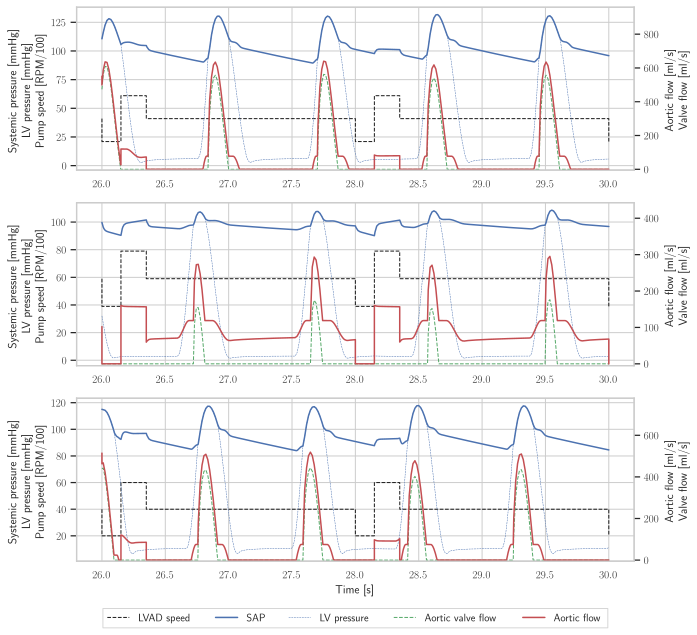

In [28]:
plot_simulations(data)

## Check all simulations


**WARNING: you should transform the cells below to raw cells once you checked results since this takes a long time**.  

---

### Verify 0D params correspond to `Y` in `normdata.mat` 

# DNN output

In [29]:
def plot_dnn_performance(Ytest, Yhat):
    
    fig, ax = plt.subplots(2, 2, figsize=(9,6))
    axlst = ax.ravel()
    colors = sns.color_palette(n_colors=4)
    
    for i, (col, color) in enumerate(zip(dnn_output_cols, colors)):
        axlst[i].scatter(Ytest.loc[:, col], Yhat.loc[:, col], s=3, color=color)
        axlst[i].set_title(dnn_output_cols_latex[i])
        axlst[i].set_xlabel(r'Exact')
        axlst[i].set_ylabel(r'Predicted')
    
    offset = .0002
    ax[1, 1].set_xlim([Ytest.loc[:, 'k_E'].min()-offset, Ytest.loc[:, 'k_E'].max()+offset])
    ax[1, 1].set_ylim([Yhat.loc[:, 'k_E'].min()-offset, Yhat.loc[:, 'k_E'].max()+offset])
    
    plt.tight_layout()
    return fig, ax

In [75]:
dnn_output_cols_latex

['$E_{max,lv}$', '$E_{max,lv,0}$', '$G_{E_{max,lv}}$', '$k_{E,lv}$']

## Predicted vs exact plot

The plot of exact vs predicted parameters would yield a figure with 10,000 points, which renders a 37MB-file. We thus subsample the points:

In [48]:
a.annotate()

<AxesSubplot:title={'center':'$E_{max,lv}$'}, xlabel='Exact', ylabel='Predicted'>

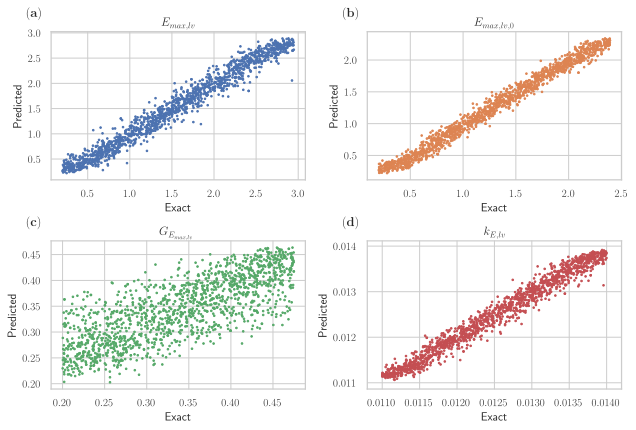

In [109]:
# Subsampling
frac = 0.15
N = round(frac * Ytest.shape[0])
idxsub = np.random.choice(Ytest.shape[0], size=N)
fig, ax = plot_dnn_performance(Ytest.iloc[idxsub], Yhat.iloc[idxsub])

# Label
for a, l in zip(ax.ravel(), ['a', 'b', 'c', 'd']):
    a.annotate(r'$\mathbf{('+l+')}$', (-.1, 1.1), xycoords='axes fraction', size=13)

plt.savefig('figs/dnn_predicted_vs_exact.eps')

## Errors

We compute the relative error of the DNN output variable $y_i$ as follows:

$$\text{rel err} = \frac{|y_i - \hat y_i|}{y_i}$$

In [ ]:
Y

In [ ]:
Yerr = pd.DataFrame()
for col in dnn_output_cols:
    Yerr[col] = np.abs(Y[col] - Y[col+'_hat'])
Yerr

In [ ]:
statserr = Yerr.describe().loc[['mean', 'min', '50%', 'max', 'std'], :].rename(
    index={'min':'Min Err', 'max': 'Max Err', 'mean': 'Mean Err', 'std': 'Std Err', '50%': 'Median Err'},
    columns=dict(zip(Yerr.columns, dnn_output_cols_latex))
)
statserr

In [ ]:
Yrelerr = pd.DataFrame()
for col in dnn_output_cols:
    Yrelerr[col] = np.abs(Y[col] - Y[col+'_hat']) / Y[col]
Yrelerr

In [2]:
statsrelerr = Yrelerr.describe().loc[['mean', 'min', '50%', 'max', 'std'], :].rename(
    index={'min':'Min Rel Err', 'max': 'Max Rel Err', 'mean': 'Mean Rel Err', 'std': 'Std Rel Err', '50%': 'Median Rel Err'},
    columns=dict(zip(Yrelerr.columns, dnn_output_cols_latex))
)
statsrelerr

NameError: name 'Yrelerr' is not defined

In [ ]:
def get_tab3_line(type_='exact', operation=np.mean, op_desc='Mean'):
    cols = dnn_output_cols
    if type_ == 'pred':
        cols = [c + '_hat' for c in dnn_output_cols]
        
    return pd.Series(
        [operation(Y[c]) for c in cols],
        index=dnn_output_cols_latex,
        name=op_desc + r'\textsubscript{'+ type_ + '}'
    )

In [ ]:
extension = [
    get_tab3_line(*args)
    for args in [
        ('exact', np.min, 'Min'),
        ('exact', np.max, 'Max'),
        ('exact', np.mean, 'Mean'),
        ('pred', np.min, 'Min'),
        ('pred', np.max, 'Max'),
        ('pred', np.mean, 'Mean'),
    ]
]

extension = pd.DataFrame(extension)
tab3 = pd.concat((extension, statserr, statsrelerr))
tab3

### Generate Latex Table

In [ ]:
import math
# http://randlet.com/blog/python-significant-figures-format/
def to_precision(x,p):
    """
    returns a string representation of x formatted with a precision of p

    Based on the webkit javascript implementation taken from here:
    https://code.google.com/p/webkit-mirror/source/browse/JavaScriptCore/kjs/number_object.cpp
    """

    x = float(x)

    if x == 0.:
        return "0." + "0"*(p-1)

    out = []

    if x < 0:
        out.append("-")
        x = -x

    e = int(math.log10(x))
    tens = math.pow(10, e - p + 1)
    n = math.floor(x/tens)

    if n < math.pow(10, p - 1):
        e = e -1
        tens = math.pow(10, e - p+1)
        n = math.floor(x / tens)

    if abs((n + 1.) * tens - x) <= abs(n * tens -x):
        n = n + 1

    if n >= math.pow(10,p):
        n = n / 10.
        e = e + 1

    m = "%.*g" % (p, n)

    if e < -2 or e >= p:
        out.append(m[0])
        if p > 1:
            out.append(".")
            out.extend(m[1:p])
        out.append('e')
        if e > 0:
            out.append("+")
        out.append(str(e))
    elif e == (p -1):
        out.append(m)
    elif e >= 0:
        out.append(m[:e+1])
        if e+1 < len(m):
            out.append(".")
            out.extend(m[e+1:])
    else:
        out.append("0.")
        out.extend(["0"]*-(e+1))
        out.append(m)

    return "".join(out)

In [ ]:
#formatter = lambda n: np.format_float_scientific(n, precision=2)
#formatter = '{:.4f}'.format
formatter = lambda e: to_precision(e, 3)
caption = """Relative absolute errors of the DNN output for the six layers and sixty-four neurons architecture"""
label = "tab:dnn_relerr"
latex = tab3.to_latex(float_format=formatter, caption=caption, label=label)
latex = latex.replace('\\toprule', '\hline')
latex = latex.replace('\\midrule', '\hline')
latex = latex.replace('\\bottomrule', '\hline')
with open('data/dnn_relerr.tex', 'w') as f:
    f.write(latex)
    
print(latex)

### Investigate outliers

In [ ]:
outlier_mask = Yerr.Emax > 0.2
outlier_mask.sum()

In [ ]:
Y[outlier_mask]

### Investigate relative error dependent on range of parameter values

We now want to generate measured values with a fixed relative error, given the true values, in order to generate bounds and see how the range of the parameter affects the relative error:

In [ ]:
def get_bounds(real, relerr=5):
    delta = relerr * real / 100
    lower = real - delta
    upper = real + delta
    return lower, upper

In [ ]:
def plot_bounds(minval, maxval, ax, relerr):
    p = np.linspace(minval, maxval, 100)
    upper, lower = get_bounds(p, relerr)
    ax.plot(p, p, 'k--')
    ax.plot(p, lower, 'k', p, upper, 'k')

relerr = 10
fig, ax = plot_dnn_performance(Ytest.iloc[idxsub], Yhat.iloc[idxsub])
plot_bounds(0.2, 2.95, ax[0, 0], relerr)
plot_bounds(0.2, 2.392, ax[0, 1], relerr)
plot_bounds(0.2, 0.475, ax[1, 0], relerr)
plot_bounds(0.011, 0.014, ax[1, 1], relerr)

fake_pt1_x, fake_pt1_y = 0.011, 0.014
relerr_pt1 = (fake_pt1_y-fake_pt1_x) / fake_pt1_x * 100
ax[1, 1].plot(fake_pt1_x, fake_pt1_y, 'rx')
ax[1, 1].text(fake_pt1_x*.99, fake_pt1_y*1.01, f'Fake point\nRel err={relerr_pt1:.0f}\%')

fake_pt2_x, fake_pt2_y = 0.25, 3
relerr_pt2 = (fake_pt2_y-fake_pt2_x) / fake_pt2_x * 100
ax[0, 0].plot(fake_pt2_x, fake_pt2_y, 'rx')
ax[0, 0].text(fake_pt2_x*.99, fake_pt2_y*1.01, f'Fake point\nRel err={relerr_pt2:.0f}\%')

plt.suptitle(f'Relative error - Bars show {relerr}\% relative error', y=1.03)
plt.savefig('figs/relerr_bounds.png', bbox_inches='tight', dpi=300)

Problems:

* The bars representing 5% relative error are not parallel
* The relative error depends on the range of the parameter of interest

We should probably assess performance with a different metric.

### Error as percentage of deviation of max-min

In [ ]:
def bounds_error_range(minval, maxval, exact, error=5):
    rng = maxval - minval
    delta = rng * error / 100
    up = exact + delta
    low = exact - delta
    return up, low

In [ ]:
def plot_bounds_range(minval, maxval, ax, error=5):
    exact = np.linspace(minval, maxval, 100)
    up, low = bounds_error_range(minval, maxval, exact, error)
    ax.plot(exact, up, 'k', exact, low, 'k', exact, exact, '--k')

In [ ]:
fig, ax = plot_dnn_performance(Ytest.iloc[idxsub], Yhat.iloc[idxsub])
err = 10
plot_bounds_range(0.2, 2.95, ax[0, 0], err)
plot_bounds_range(0.2, 2.392, ax[0, 1], err)
plot_bounds_range(0.2, 0.475, ax[1, 0], err)
plot_bounds_range(0.011, 0.014, ax[1, 1], err)


fake_pt1_x, fake_pt1_y = 0.011, 0.014
range_err_pt1 = (fake_pt1_y-fake_pt1_x) / (.014 - .011) * 100
ax[1, 1].plot(fake_pt1_x, fake_pt1_y, 'rx')
ax[1, 1].text(fake_pt1_x*.99, fake_pt1_y*1.01, f'Fake point\nRange err={range_err_pt1:.0f}\%')

fake_pt2_x, fake_pt2_y = 0.25, 3
range_err_pt2 = (fake_pt2_y-fake_pt2_x) / (2.95 - .2) * 100
ax[0, 0].plot(fake_pt2_x, fake_pt2_y, 'rx')
ax[0, 0].text(fake_pt2_x*.99, fake_pt2_y*1.01, f'Fake point\nRange err={range_err_pt2:.0f}\%')

plt.suptitle(f'Error as percentage of deviation from max - min of exact value (bars indicate {err}\%)', y=1.03)
plt.savefig('figs/error_range.png', bbox_inches='tight', dpi=300)

# Hemodynamic quantities

## Matlab table

In [ ]:
table

In [ ]:
def rename(name):
    if name.endswith('exact') or name.endswith('predicted'):
        suffix = name.split(' ')[1]
        newname = name.split(' ')[0] + r'\textsubscript{'+suffix+'}'
        return newname
    return name

In [ ]:
table_latex = table[['LVEF', 'LVEDV', 'LVESV', 'LVEDP', 'LVESP', 'PCPW']]

table_latex.index = [
    r'Min\textsubscript{exact}',
    r'Max\textsubscript{exact}',
    r'Mean\textsubscript{exact}',
    r'SD\textsubscript{exact}',
    r'Min\textsubscript{predicted}',
    r'Max\textsubscript{predicted}',
    r'Mean\textsubscript{predicted}',
    r'SD\textsubscript{predicted}',
    'Mean Err',
    'Mean Rel Err',
    'Err SD',
    'Err CI min',
    'Err CI max'
]

table_latex

In [ ]:
caption = 'Hemodynamic quantities between simulation with predicted and exact parameters'
label = 'tab:hemo'
formatter = lambda x: to_precision(x, 3)
#formatter = '{:.3g}'.format
#formatter = lambda x: np.format_float_scientific(x, precision=2, )
latex = table_latex.to_latex(float_format=formatter, label=label, caption=caption)
latex = latex.replace('\\toprule', '\hline')
latex = latex.replace('\\midrule', '\hline')
latex = latex.replace('\\bottomrule', '\hline')
with open('data/dnn_hemodynamic_table.tex', 'w') as f:
    f.write(latex)
    
print(latex)

### Another format


In [ ]:
hemo_quantities = ['LVEF', 'LVEDV', 'LVESV', 'LVEDP', 'LVESP', 'PCPW']

In [ ]:
table_latex = table[hemo_quantities]
table_latex
table_latex['type'] = 'exact'
table_latex.loc[table_latex.index.str.contains('predicted'), 'type'] = 'predicted'

table_latex = table_latex.pivot(columns='type')
table_latex

In [ ]:
caption = 'Hemodynamic quantities between simulation with predicted and exact parameters'
label = 'tab:hemo'
formatter = lambda x: ' ' if pd.isna(x) else to_precision(x, 3)
#formatter = '{:.3g}'.format
#formatter = lambda x: np.format_float_scientific(x, precision=2, )
latex = table_latex.to_latex(float_format=formatter, label=label, caption=caption)
latex = latex.replace('\\toprule', '\hline')
latex = latex.replace('\\midrule', '\hline')
latex = latex.replace('\\bottomrule', '\hline')
print(latex)

### Recompute matlab table

In [ ]:
keep_stats = ['mean', 'min', '50%', 'max', 'std']

In [ ]:
stats = X.describe().loc[keep_stats, hemo_quantities]

stats = stats.rename(
    index={'mean': 'Mean', 'std': 'SD', 'min': 'Min', '50%': 'Median', 'max': 'Max'}
)

stats = stats.rename(
    index={i: 'Exact ' + i for i in stats.index}
)

stats

In [ ]:
hemo_quantities_hat = [q + '_hat' for q in hemo_quantities]
statshat = X.describe().loc[keep_stats, hemo_quantities_hat]

statshat = statshat.rename(
    index={'mean': 'Mean', 'std': 'SD', 'min': 'Min', '50%': 'Median', 'max': 'Max'}
)

statshat = statshat.rename(
    index={i: 'Pred ' + i for i in statshat.index},
    columns=dict(zip(hemo_quantities_hat, hemo_quantities))
)

statshat

In [ ]:
Xrelerr = pd.DataFrame()
hemo_vars = filter(lambda name: '_' not in name and name != 'RPM', X.columns)
for c in hemo_vars:
    Xrelerr[c] = np.abs(X[c] - X[c+'_hat']) / X[c]

In [ ]:
Xerr = pd.DataFrame()
hemo_vars = filter(lambda name: '_' not in name and name != 'RPM', X.columns)
for c in hemo_vars:
    Xerr[c] = np.abs(X[c] - X[c+'_hat'])

In [ ]:
statserr = Xerr.describe().loc[keep_stats, hemo_quantities]

statserr = statserr.rename(
    index={'mean': 'Mean', 'std': 'SD', 'min': 'Min', '50%': 'Median', 'max': 'Max'}
)

statserr = statserr.rename(
    index={i: 'Err ' + i for i in statserr.index}
)

statserr

In [ ]:
statsrelerr = Xrelerr.describe().loc[keep_stats, hemo_quantities]

statsrelerr = statsrelerr.rename(
    index={'mean': 'Mean', 'std': 'SD', 'min': 'Min', '50%': 'Median', 'max': 'Max'}
)

statsrelerr = statsrelerr.rename(
    index={i: 'Relerr ' + i for i in statsrelerr.index}
)

statsrelerr

In [3]:
tab4 = pd.concat((stats, statshat, statserr, statsrelerr))
tab4

NameError: name 'pd' is not defined

In [ ]:
formatter = lambda x: to_precision(x, 3)
latex = tab4.to_latex(float_format=formatter)

print(latex)

## Hemodynamic quantities distribution for exact- vs prediction-based simulations